In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import StandardScaler


In [268]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [269]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [270]:
df.shape

(614, 13)

In [271]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [273]:
df.isnull().sum()
#missing values in columns

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#dropping the missing value

In [274]:
df=df.dropna()

In [275]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [276]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [277]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [278]:
# Dependent column values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [279]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=3)

In [280]:
df['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

comparison between parameters in getting loan:

<AxesSubplot:xlabel='Gender', ylabel='count'>

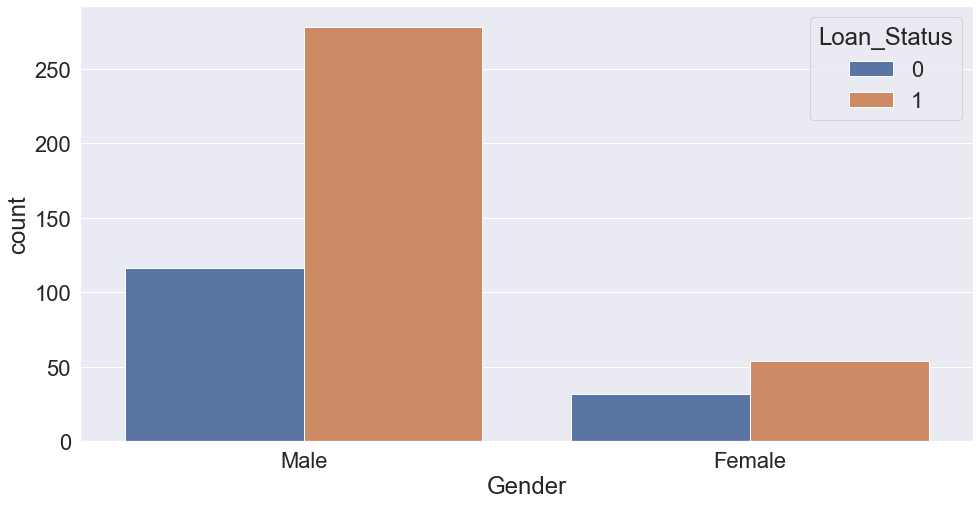

In [281]:
plt.figure(figsize = (16, 8))
sns.set(font_scale = 2)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Married', ylabel='count'>

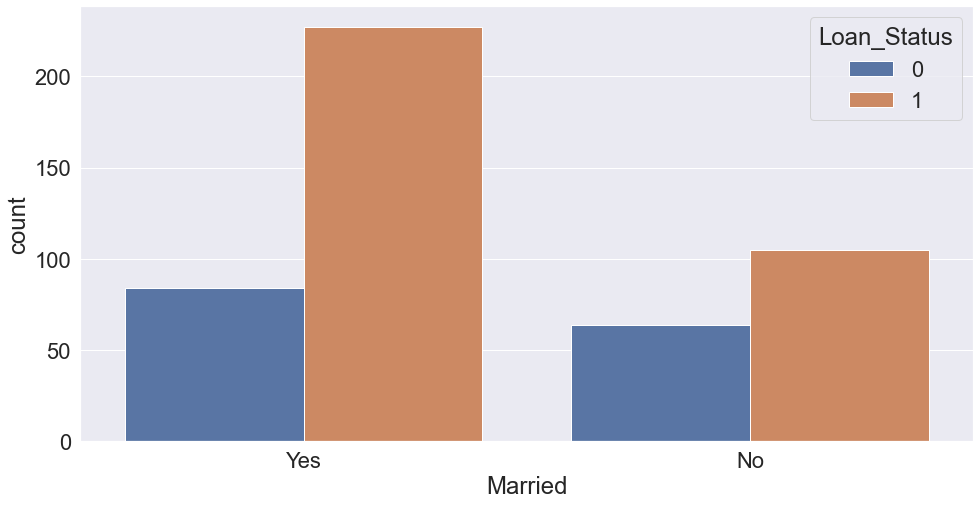

In [282]:
plt.figure(figsize = (16, 8))
sns.set(font_scale = 2)
sns.countplot(df['Married'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Education', ylabel='count'>

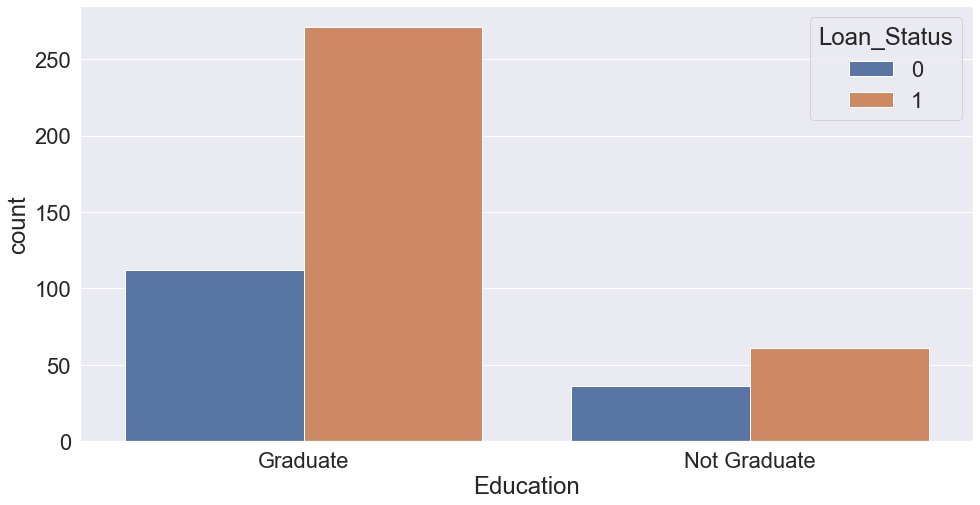

In [283]:
plt.figure(figsize = (16, 8))
sns.set(font_scale = 2)
sns.countplot(df['Education'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

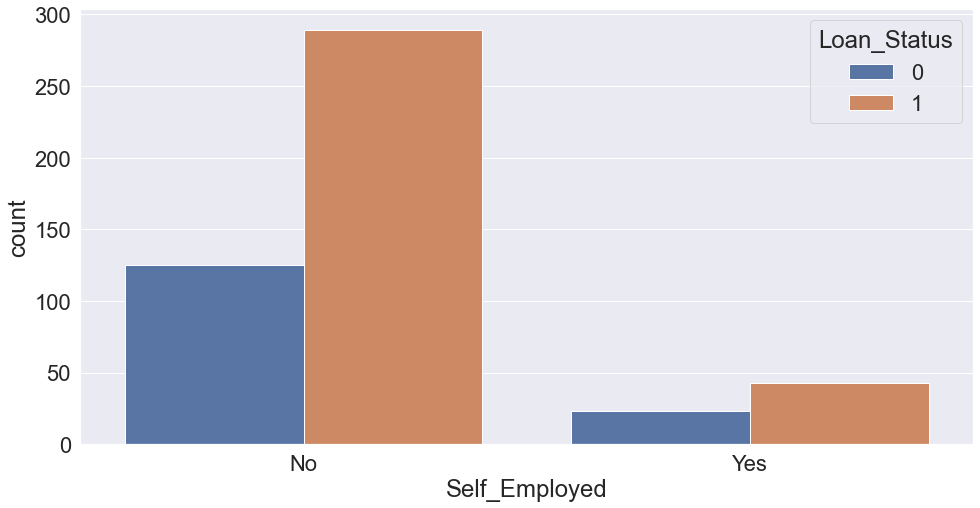

In [284]:
plt.figure(figsize = (16, 8))
sns.set(font_scale = 2)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

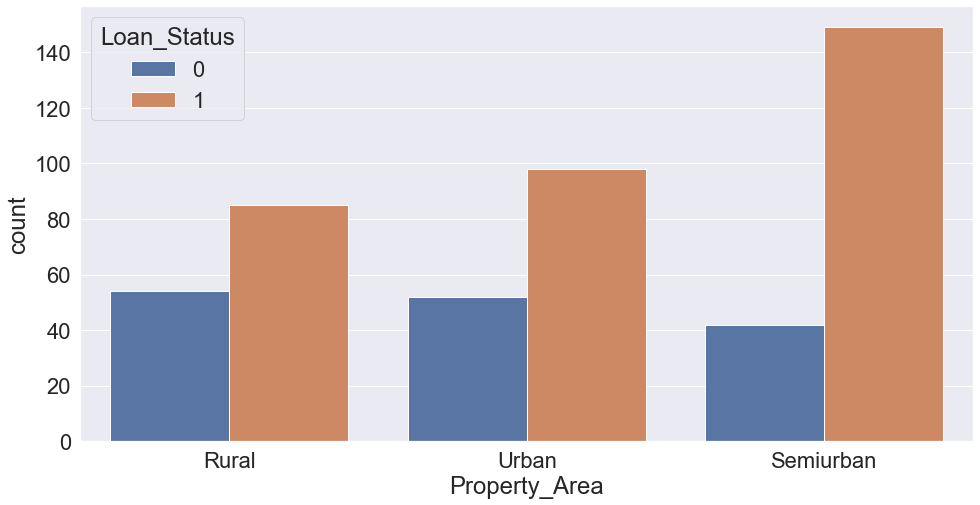

In [285]:
plt.figure(figsize = (16, 8))
sns.set(font_scale = 2)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

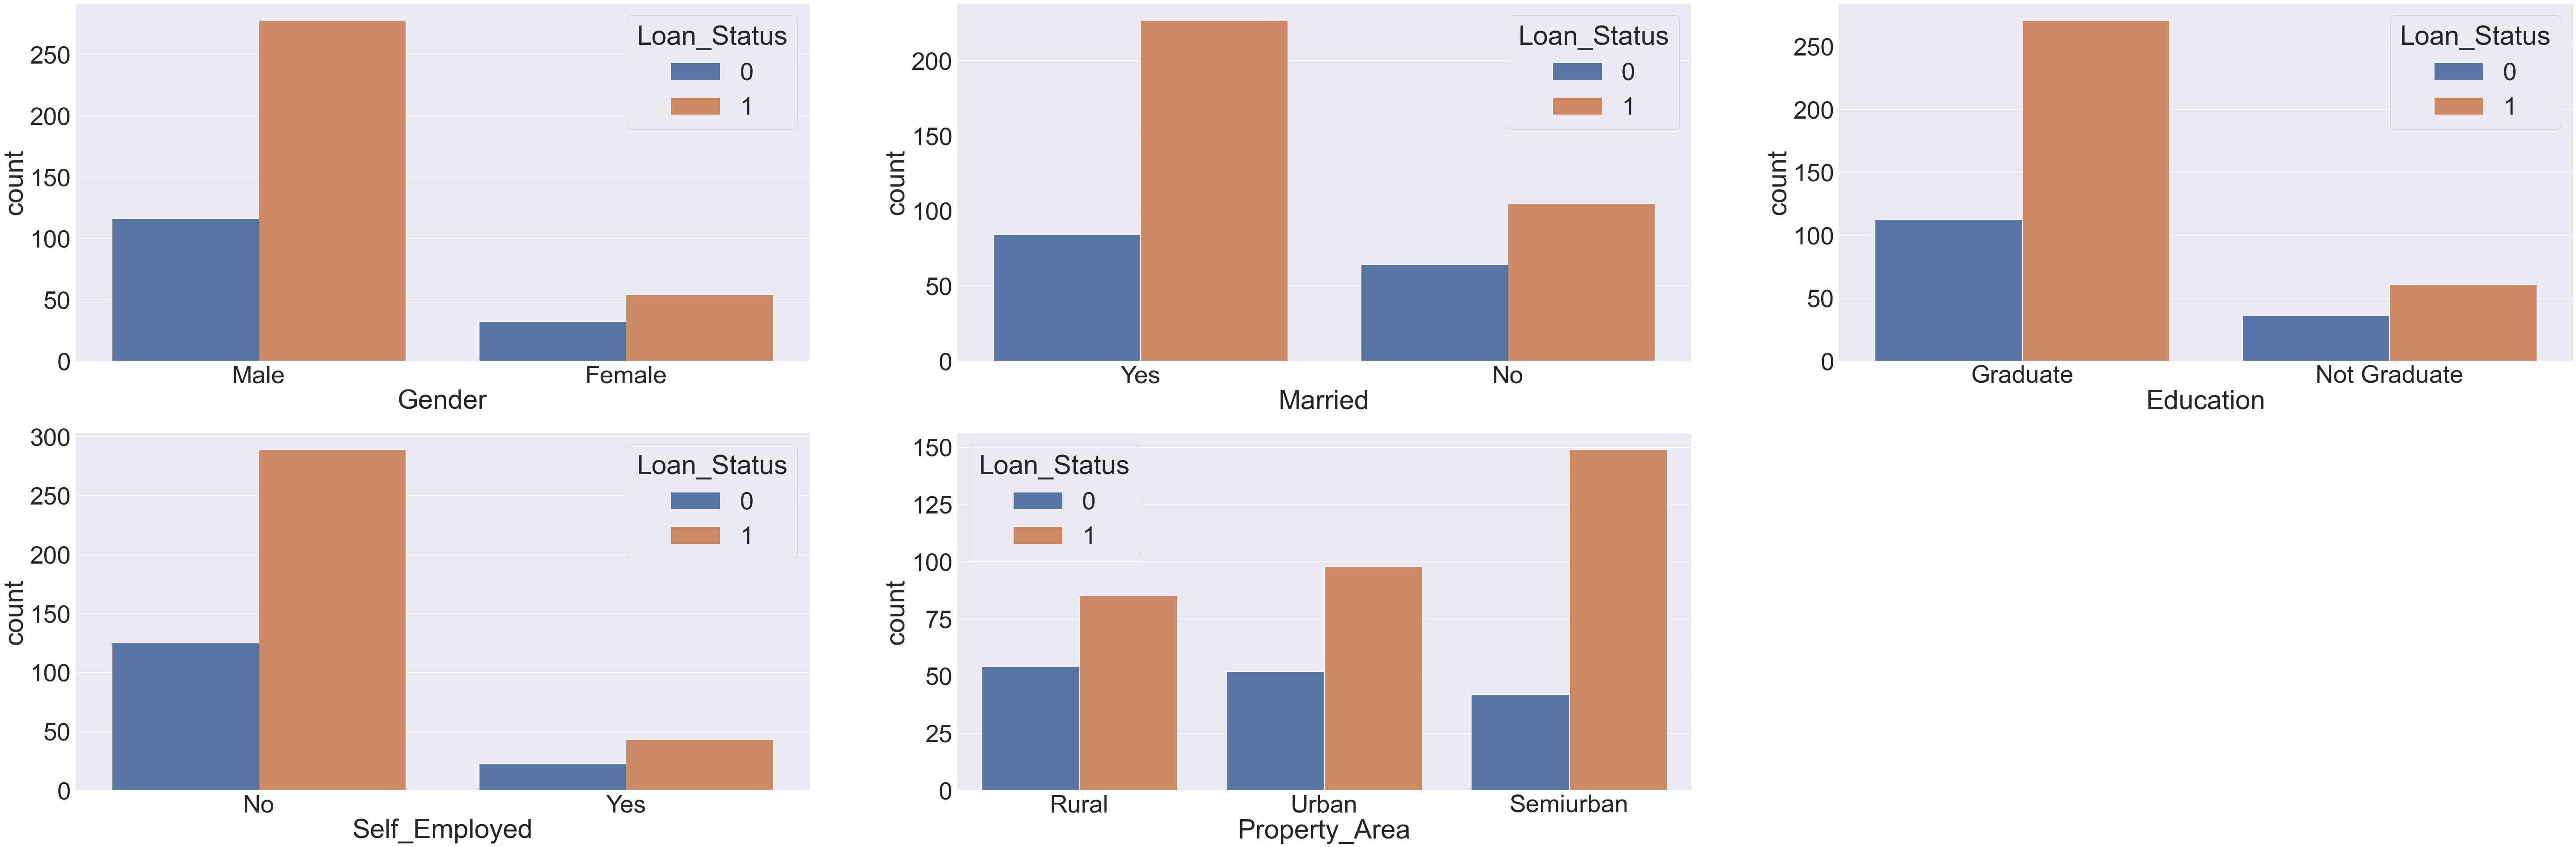

In [286]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

Replacing variable values to numerical form

In [287]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [288]:
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [289]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [290]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    311
0    169
Name: Married, dtype: int64

In [291]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    383
0     97
Name: Education, dtype: int64

In [292]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

In [293]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    191
2    150
0    139
Name: Property_Area, dtype: int64

In [294]:
df['LoanAmount'].value_counts()

120.0    13
100.0    13
110.0    13
187.0    12
128.0     9
         ..
280.0     1
240.0     1
214.0     1
59.0      1
253.0     1
Name: LoanAmount, Length: 186, dtype: int64

In [295]:
df['Loan_Amount_Term'].value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64

In [296]:
df['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [297]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [298]:
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [299]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Splitting the data into Train and Test set

In [300]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [301]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [302]:
classifier = svm.SVC(kernel='linear')

In [303]:
#training the support Vector Machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [304]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [305]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7685185185185185


In [306]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [307]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8541666666666666


Model training

In [308]:
scaler = StandardScaler()

In [309]:
scaler.fit(X)

StandardScaler()

In [310]:
standardized_data = scaler.transform(X)

In [311]:
print(standardized_data)

[[ 0.46719815  0.73716237  0.21859918 ...  0.27554157  0.41319694
  -1.31886834]
 [ 0.46719815  0.73716237 -0.76203265 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237 -0.76203265 ...  0.27554157  0.41319694
   1.25977445]
 ...
 [ 0.46719815  0.73716237  0.21859918 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237  1.19923101 ...  0.27554157  0.41319694
   1.25977445]
 [-2.14041943 -1.35655324 -0.76203265 ...  0.27554157 -2.42015348
  -0.02954695]]


In [312]:
X = standardized_data
Y = df['Loan_Status']

In [313]:
print(X)
print(Y)

[[ 0.46719815  0.73716237  0.21859918 ...  0.27554157  0.41319694
  -1.31886834]
 [ 0.46719815  0.73716237 -0.76203265 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237 -0.76203265 ...  0.27554157  0.41319694
   1.25977445]
 ...
 [ 0.46719815  0.73716237  0.21859918 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237  1.19923101 ...  0.27554157  0.41319694
   1.25977445]
 [-2.14041943 -1.35655324 -0.76203265 ...  0.27554157 -2.42015348
  -0.02954695]]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [314]:
input_data = (1,1,1,1,1,5700,0,1280,360,1.0,0)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The person is getting loan')
else:
  print('The person is not getting loan')



[[ 0.46719815  0.73716237  0.21859918  0.50325312  2.50454133  0.05929855
  -0.604633   14.11594728  0.27554157  0.41319694 -1.31886834]]
[0]
The person is not getting loan
